In [44]:
import pandas as pd
import os
import re
import numpy as np


In [45]:
weather = pd.read_csv('weather_data/openweather_data_calgary.csv')

# Setting index
weather['Date'] = pd.to_datetime(weather['Date'])
weather.set_index('Date', inplace=True)

weather.head()

,Temperature,Feels like,Pressure,Humidity,Minimum Temp (F),Maximum Temp (F),Wind Speed,Wind Degree,Rain 1h,Clouds All,Weather Id,Weather Main,Weather Description,Weather Icon
Date,,,,,,,,,,,,,,
2024-02-12 10:00:00,1.19,-2.83,1012,73,-0.69,2.03,4.02,299,-999.0,100,804,Clouds,overcast clouds,04d
2024-02-12 11:00:00,1.86,-1.37,1012,68,0.65,3.14,3.13,290,-999.0,100,804,Clouds,overcast clouds,04d
2024-02-12 12:00:00,2.72,-1.22,1011,56,1.54,4.23,4.47,328,-999.0,100,804,Clouds,overcast clouds,04d
2024-02-12 13:00:00,2.54,-2.92,1011,49,0.97,4.62,7.72,340,-999.0,75,803,Clouds,broken clouds,04d
2024-02-12 14:00:00,2.01,-1.53,1011,48,0.42,4.30,3.58,342,-999.0,100,804,Clouds,overcast clouds,04d


#### Load Demand Data

In [46]:
load1 = pd.read_csv('synthetic_load_data/synthetic_load_demand_EUI_1_16_area_11900_calgary.csv')

# Setting index
load1['Timestamp'] = pd.to_datetime(load1['Timestamp'])
load1.set_index('Timestamp', inplace=True)

load1.head()

,Temperature,Humidity,WindSpeed,Synthetic Load Demand (kWh)
Timestamp,,,,
2024-02-12 10:00:00,1.19,73,4.02,462.869770
2024-02-12 11:00:00,1.86,68,3.13,425.721927
2024-02-12 12:00:00,2.72,56,4.47,466.729809
2024-02-12 13:00:00,2.54,49,7.72,448.854024
2024-02-12 14:00:00,2.01,48,3.58,448.615342


#### Solar Irradiance Data

In [47]:
nasa_solar = pd.read_csv('solar_irradiance_data/nasa_power_utc_calgary.csv')

# Setting index
nasa_solar['date'] = pd.to_datetime(nasa_solar['date'])
nasa_solar.set_index('date', inplace=True)

nasa_solar.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DIFF,PRECTOTCORR,SZA,RH2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS10M,PS,T2M,ALLSKY_SRF_ALB
date,,,,,,,,,,,,,,
2024-02-05 00:00:00,2024,2,5,0,9.63,6.59,88.93,82.76,10.38,7.4,1.09,86.64,-6.45,0.36
2024-02-05 01:00:00,2024,2,5,1,0.00,4.94,90.00,80.55,0.00,0.0,0.84,86.58,-6.31,-999.00
2024-02-05 02:00:00,2024,2,5,2,0.00,4.07,90.00,79.25,0.00,0.0,0.52,86.52,-6.13,-999.00
2024-02-05 03:00:00,2024,2,5,3,0.00,3.17,90.00,78.75,0.00,0.0,0.34,86.45,-6.01,-999.00
2024-02-05 04:00:00,2024,2,5,4,0.00,1.63,90.00,78.40,0.00,0.0,0.72,86.38,-6.08,-999.00


In [48]:
nasa_solar.index = nasa_solar.index - pd.Timedelta(hours=7)

nasa_solar = nasa_solar.drop(columns=['YEAR', 'MO', 'DY', 'HR'])
nasa_solar.head()

,ALLSKY_SFC_SW_DIFF,PRECTOTCORR,SZA,RH2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS10M,PS,T2M,ALLSKY_SRF_ALB
date,,,,,,,,,,
2024-02-04 17:00:00,9.63,6.59,88.93,82.76,10.38,7.4,1.09,86.64,-6.45,0.36
2024-02-04 18:00:00,0.00,4.94,90.00,80.55,0.00,0.0,0.84,86.58,-6.31,-999.00
2024-02-04 19:00:00,0.00,4.07,90.00,79.25,0.00,0.0,0.52,86.52,-6.13,-999.00
2024-02-04 20:00:00,0.00,3.17,90.00,78.75,0.00,0.0,0.34,86.45,-6.01,-999.00
2024-02-04 21:00:00,0.00,1.63,90.00,78.40,0.00,0.0,0.72,86.38,-6.08,-999.00


In [49]:
load1_par = pd.read_json('synthetic_load_data/synthetic_load_data_parameters_EUI_1_16_area_11900_calgary.json', orient='index', compression=None)

load1_par.index.name = 'parameter'
load1_par.columns = ['value']

load1_par.head()

,value
parameter,
hours_per_day,24.0
days_per_year,365.0
daily_fluctuation,60.0
weekend_daily_fluctuation,20.0
seasonal_fluctuation,120.0


In [50]:
# Example filename
filename = 'synthetic_load_data/synthetic_load_demand_EUI_1_16_area_11900_calgary.csv'

# Extract the portion of the filename you need
basename = os.path.basename(filename)
name_without_extension = os.path.splitext(basename)[0]

# Use regular expression to find the number after 'area_' and before the next underscore
match = re.search(r'area_(\d+)_', name_without_extension)
if match:
    area_number = int(match.group(1))
    print(area_number)
else:
    print("No match found")

11900


In [79]:
area_factor = 0.5 # Ratio of roof area to solar panel area
pv_panel_efficiency = 0.20 # Efficiency of solar panels
pv_panel_area = area_number * area_factor # Area of solar panels in m^2

df = pd.DataFrame(index=nasa_solar.index)

# Calculate the solar power generation
df['PV_Production'] = (nasa_solar['ALLSKY_SFC_SW_DWN'] * pv_panel_area * pv_panel_efficiency)/1000

df.head()

,PV_Production
date,
2024-02-04 17:00:00,8.806
2024-02-04 18:00:00,0.000
2024-02-04 19:00:00,0.000
2024-02-04 20:00:00,0.000
2024-02-04 21:00:00,0.000


In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PV_Production,8784.0,-495.24562,741.499027,-1188.81,-1188.81,-1188.81,59.4524,1116.6365


In [81]:
print(weather.shape)
print(load1.shape)
print(nasa_solar.shape)
print(df.shape)

(8510, 14)
(8510, 4)
(8784, 10)
(8784, 1)


In [82]:
print(min(weather.index),max(weather.index))
print(min(load1.index),max(load1.index))
print(min(nasa_solar.index),max(nasa_solar.index))
print(min(df.index),max(df.index))


2024-02-12 10:00:00 2025-02-03 08:00:00
2024-02-12 10:00:00 2025-01-31 23:00:00
2024-02-04 17:00:00 2025-02-04 16:00:00
2024-02-04 17:00:00 2025-02-04 16:00:00


In [83]:
print(df.shape)

# Filter rows where index in datetime is less than or equal to '2024-07-31'
df = df[df.index <= '2024-07-31']

print(df.shape)

print(min(df.index),max(df.index))

(8784, 1)
(4256, 1)
2024-02-04 17:00:00 2024-07-31 00:00:00


In [84]:
combined_df = pd.merge(df, load1, left_index=True, right_index=True, how='inner')

combined_df.head()

,PV_Production,Temperature,Humidity,WindSpeed,Synthetic Load Demand (kWh)
2024-02-12 10:00:00,203.1687,1.19,73,4.02,462.869770
2024-02-12 11:00:00,353.6085,1.86,68,3.13,425.721927
2024-02-12 12:00:00,444.6673,2.72,56,4.47,466.729809
2024-02-12 13:00:00,418.7372,2.54,49,7.72,448.854024
2024-02-12 14:00:00,379.3363,2.01,48,3.58,448.615342


In [85]:
print(combined_df.shape)

print(min(combined_df.index),max(combined_df.index))

(4071, 5)
2024-02-12 10:00:00 2024-07-31 00:00:00


In [86]:
# Calculating the Converter Losses
Converter_Loss = 0.075

combined_df['Converter Losses (kWh)'] = combined_df['PV_Production'] * Converter_Loss

# Energy output
combined_df["Energy Output"] = combined_df["Synthetic Load Demand (kWh)"] 

# Energy input
combined_df["Energy Input"] = combined_df["PV_Production"] - combined_df["Converter Losses (kWh)"]

# Calculating energy difference
combined_df['Energy Difference'] = combined_df['Energy Input'] - combined_df['Energy Output']


# Calculating surplus or deficit of energy (grid energy flow)
combined_df["Grid Energy Exported"] = combined_df["Energy Difference"].apply(lambda x: x if x >= 0 else 0)

combined_df["Grid Energy Imported"] = combined_df["Energy Difference"].apply(lambda x: x if x< 0 else 0)

combined_df.shape

(4071, 11)

In [87]:
combined_df.columns

Index(['PV_Production', 'Temperature', 'Humidity', 'WindSpeed',
       'Synthetic Load Demand (kWh)', 'Converter Losses (kWh)',
       'Energy Output', 'Energy Input', 'Energy Difference',
       'Grid Energy Exported', 'Grid Energy Imported'],
      dtype='object')

In [88]:
combined_df.describe()

,PV_Production,Temperature,Humidity,WindSpeed,Synthetic Load Demand (kWh),Converter Losses (kWh),Energy Output,Energy Input,Energy Difference,Grid Energy Exported,Grid Energy Imported
count,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000
mean,243.464541,7.694667,63.577745,2.965281,456.023139,18.259841,456.023139,225.204700,-230.818438,35.747018,-266.565457
std,295.217549,10.800943,19.801268,2.014208,137.389829,22.141316,137.389829,273.076233,259.803849,86.715989,202.276678
min,0.000000,-21.780000,16.000000,0.090000,159.229350,0.000000,159.229350,0.000000,-648.708327,0.000000,-648.708327
25%,0.000000,1.095000,48.000000,1.340000,334.899125,0.000000,334.899125,0.000000,-419.755296,0.000000,-419.755296
50%,82.943000,8.130000,67.000000,2.620000,451.295740,6.220725,451.295740,76.722275,-276.411661,0.000000,-276.411661
75%,456.841000,15.140000,81.000000,4.020000,584.965824,34.263075,584.965824,422.577925,-50.785326,0.000000,-50.785326
max,1116.636500,34.630000,99.000000,18.520000,715.093399,83.747737,715.093399,1032.888762,599.493466,599.493466,0.000000


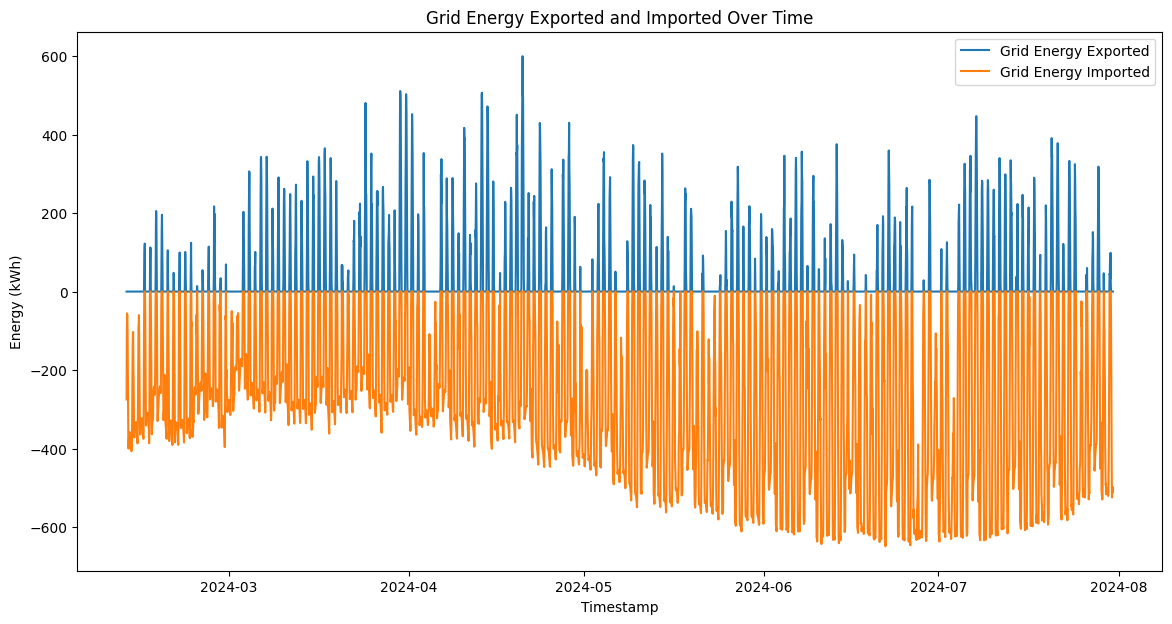

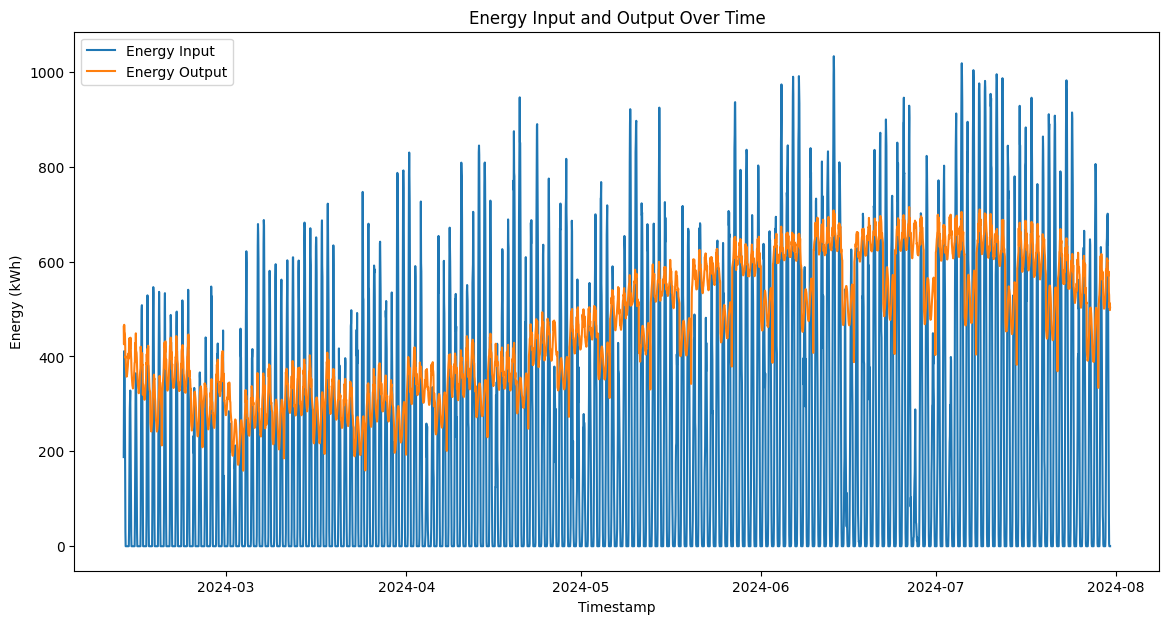

In [89]:
import matplotlib.pyplot as plt

# Plot Grid Input and Grid Output
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Grid Energy Exported'], label='Grid Energy Exported')
plt.plot(combined_df.index, combined_df['Grid Energy Imported'], label='Grid Energy Imported')
plt.xlabel('Timestamp')
plt.ylabel('Energy (kWh)')
plt.title('Grid Energy Exported and Imported Over Time')
plt.legend()
plt.show()

# Plot Energy Input and Energy Output
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Energy Input'], label='Energy Input')
plt.plot(combined_df.index, combined_df['Energy Output'], label='Energy Output')
plt.xlabel('Timestamp')
plt.ylabel('Energy (kWh)')
plt.title('Energy Input and Output Over Time')
plt.legend()
plt.show()

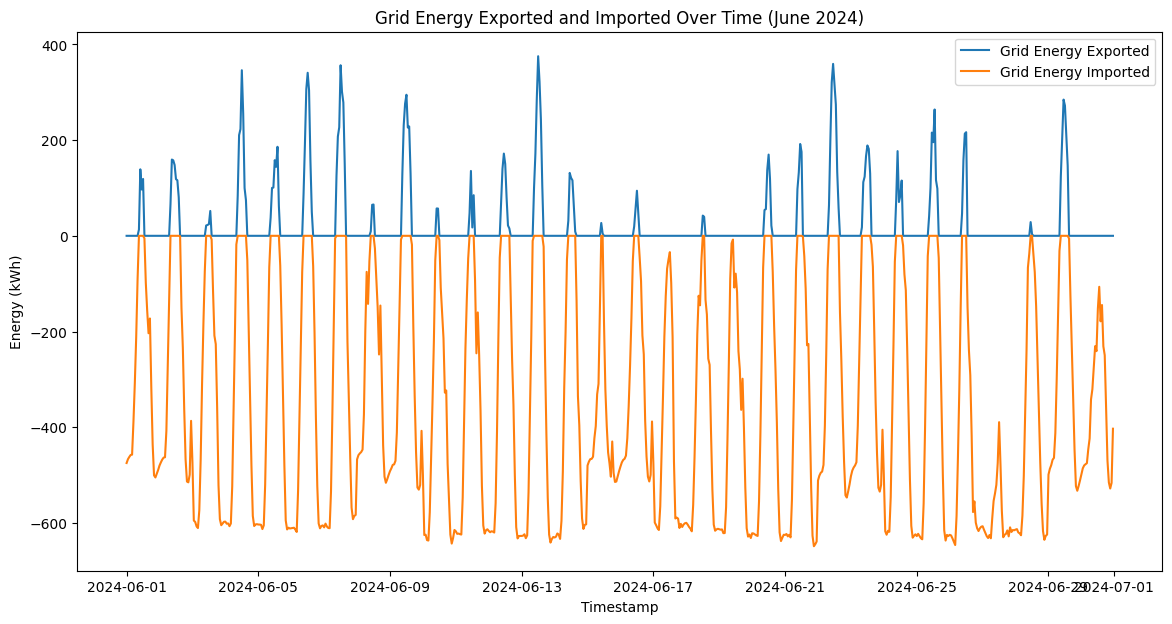

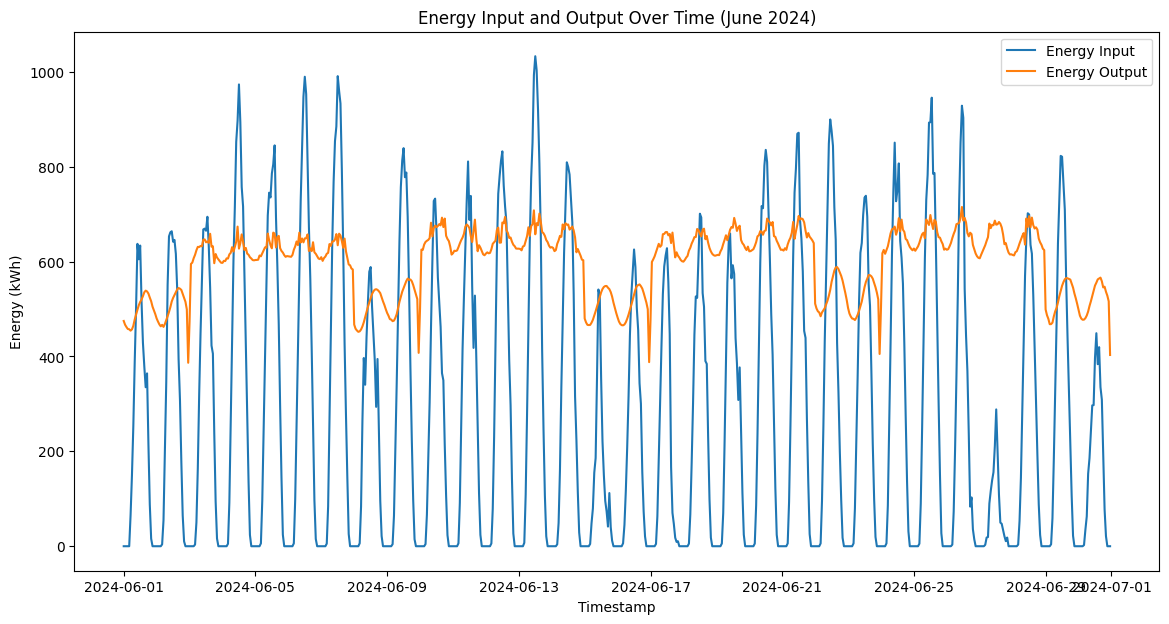

In [90]:
# Define the date range for the subset
start_date = '2024-06-01'
end_date = '2024-06-30'

# Filter the DataFrame by the date range
subset_df = combined_df.loc[start_date:end_date]

# Plot the subset
plt.figure(figsize=(14, 7))
plt.plot(subset_df.index, subset_df['Grid Energy Exported'], label='Grid Energy Exported')
plt.plot(subset_df.index, subset_df['Grid Energy Imported'], label='Grid Energy Imported')
plt.xlabel('Timestamp')
plt.ylabel('Energy (kWh)')
plt.title('Grid Energy Exported and Imported Over Time (June 2024)')
plt.legend()
plt.show()

# Plot Energy Input and Energy Output for the subset
plt.figure(figsize=(14, 7))
plt.plot(subset_df.index, subset_df['Energy Input'], label='Energy Input')
plt.plot(subset_df.index, subset_df['Energy Output'], label='Energy Output')
plt.xlabel('Timestamp')
plt.ylabel('Energy (kWh)')
plt.title('Energy Input and Output Over Time (June 2024)')
plt.legend()
plt.show()

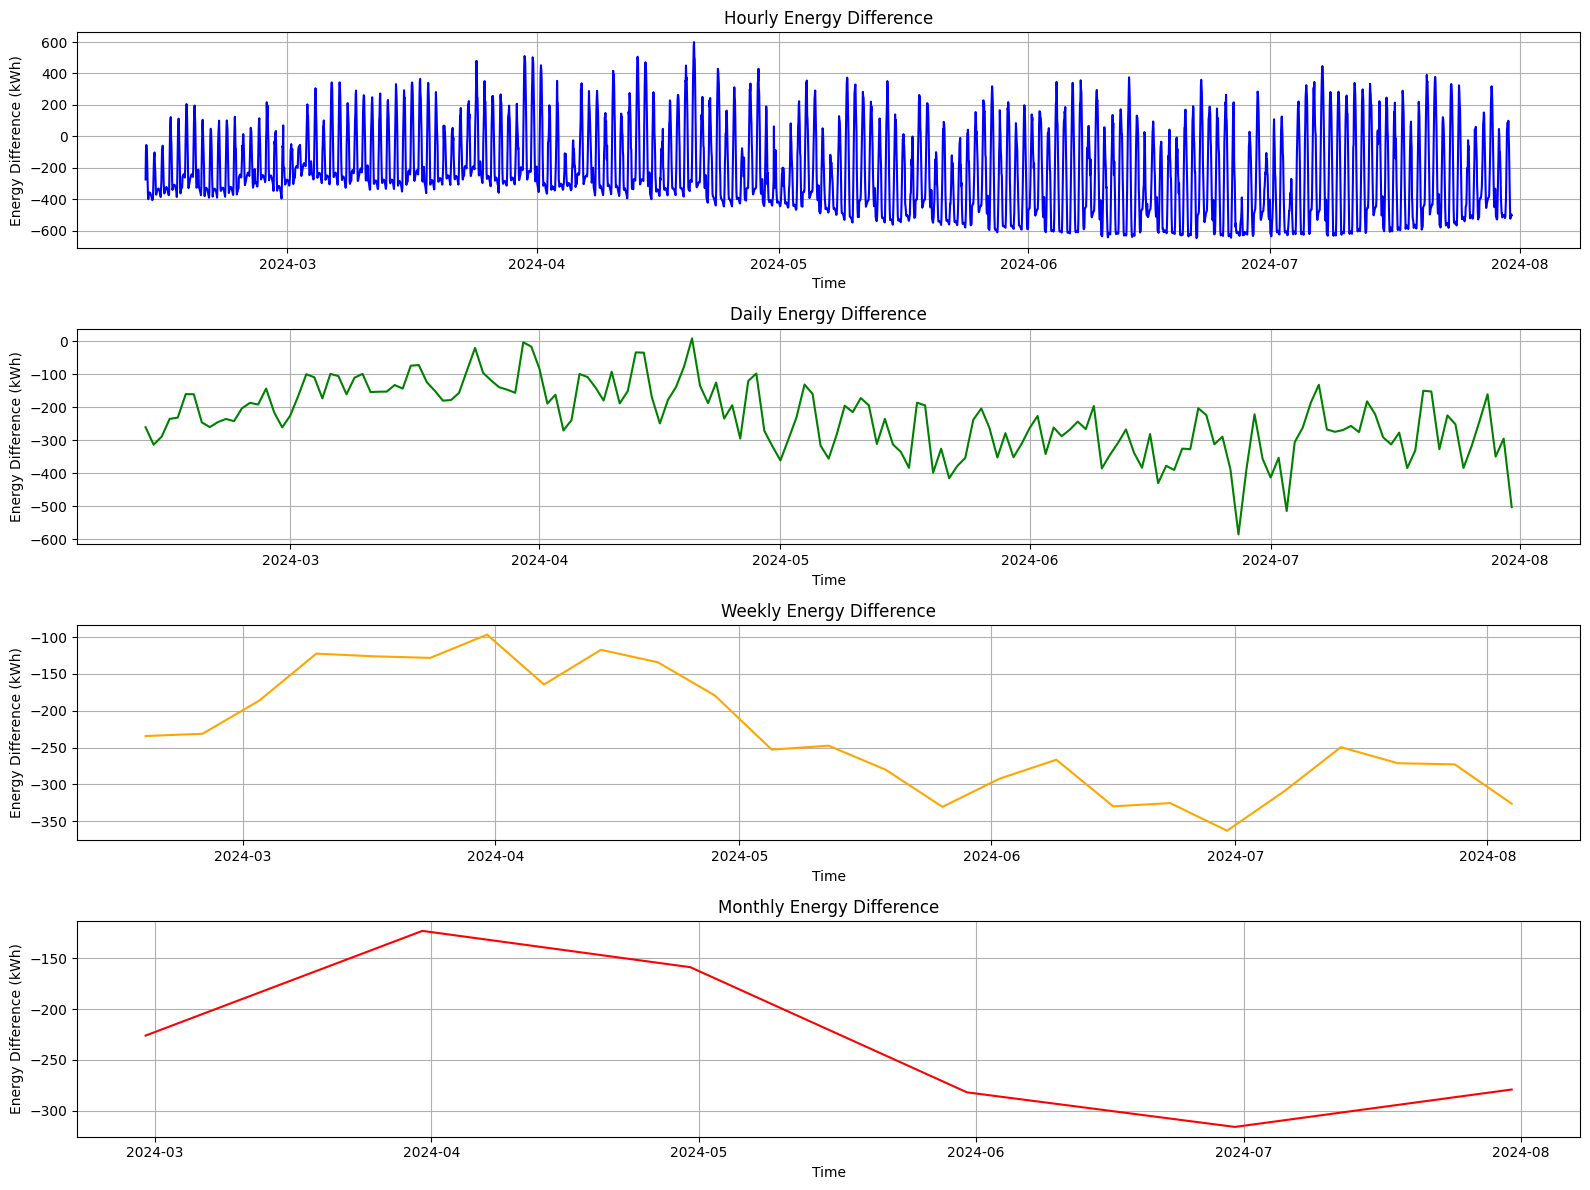

In [91]:
# Resample the data for different time scales
hourly_data = combined_df['Energy Difference'].resample('h').mean()
daily_data = combined_df['Energy Difference'].resample('D').mean()
weekly_data = combined_df['Energy Difference'].resample('W').mean()
monthly_data = combined_df['Energy Difference'].resample('ME').mean()

# Plot the data
plt.figure(figsize=(16, 12))

# Hourly data plot
plt.subplot(4, 1, 1)
plt.plot(hourly_data.index, hourly_data, color='blue', label='Hourly Energy Difference')
plt.title('Hourly Energy Difference')
plt.xlabel('Time')
plt.ylabel('Energy Difference (kWh)')
plt.grid(True)

# Daily data plot
plt.subplot(4, 1, 2)
plt.plot(daily_data.index, daily_data, color='green', label='Daily Energy Difference')
plt.title('Daily Energy Difference')
plt.xlabel('Time')
plt.ylabel('Energy Difference (kWh)')
plt.grid(True)

# Weekly data plot
plt.subplot(4, 1, 3)
plt.plot(weekly_data.index, weekly_data, color='orange', label='Weekly Energy Difference')
plt.title('Weekly Energy Difference')
plt.xlabel('Time')
plt.ylabel('Energy Difference (kWh)')
plt.grid(True)

# Monthly data plot
plt.subplot(4, 1, 4)
plt.plot(monthly_data.index, monthly_data, color='red', label='Monthly Energy Difference')
plt.title('Monthly Energy Difference')
plt.xlabel('Time')
plt.ylabel('Energy Difference (kWh)')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:
combined_df.to_csv('combined_data.csv', index=False)